In [44]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from sklearn.decomposition import PCA

In [20]:
project_path = "/Users/davidsewell/Github/JaneStreetComp"
data_path = "/Users/davidsewell/MLData/JaneStreet"

In [17]:
os.chdir(project_path)

In [19]:
from src.data import JaneData

In [21]:
jane_street = JaneData(data_path)

In [36]:
train_data = jane_street._train_dir

In [37]:
train_data.head()

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
0,0,0.000000,0.009916,0.014079,0.008773,0.001390,0.006270,1,-1.872746,-2.191242,...,NaN,1.168391,8.313583,1.782433,14.018213,2.653056,12.600292,2.301488,11.445807,0
1,0,16.673515,-0.002828,-0.003226,-0.007319,-0.011114,-0.009792,-1,-1.349537,-1.704709,...,NaN,-1.178850,1.777472,-0.915458,2.831612,-1.417010,2.297459,-1.304614,1.898684,1
2,0,0.000000,0.025134,0.027607,0.033406,0.034380,0.023970,-1,0.812780,-0.256156,...,NaN,6.115747,9.667908,5.542871,11.671595,7.281757,10.060014,6.638248,9.427299,2
3,0,0.000000,-0.004730,-0.003273,-0.000461,-0.000476,-0.003200,-1,1.174378,0.344640,...,NaN,2.838853,0.499251,3.033732,1.513488,4.397532,1.266037,3.856384,1.013469,3
4,0,0.138531,0.001252,0.002165,-0.001215,-0.006219,-0.002604,1,-3.172026,-3.093182,...,NaN,0.344850,4.101145,0.614252,6.623456,0.800129,5.233243,0.362636,3.926633,4


In [59]:
len(train_data)

2390491

In [60]:
num_null = len(train_data[train_data["feature_121"].isna()]["feature_121"])

In [61]:
print(num_null / len(train_data))

0.02922161179439705


In [62]:
def replace_with_mean(x):
    mean = x.mean()
    x[x.isna()] = mean
    return x

In [25]:
feature_col = [f"feature_{i}" for i in range(130)]

In [38]:
features = train_data[feature_col]

In [28]:
features.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129
count,2.390491e+06,2.390491e+06,2.390491e+06,2.390043e+06,2.390043e+06,2.390491e+06,2.390491e+06,1.997356e+06,1.997356e+06,2.389703e+06,...,2.320637e+06,2.320637e+06,2.390268e+06,2.390268e+06,2.374408e+06,2.374408e+06,2.381638e+06,2.381638e+06,2.388570e+06,2.388570e+06
mean,9.838565e-03,3.855776e-01,3.576875e-01,8.919166e-03,4.150056e-03,-3.714619e-03,-1.258924e-02,5.177655e-02,2.682810e-02,2.488133e-01,...,3.351270e-01,2.687757e-01,3.435523e-01,2.799973e-01,3.351537e-01,2.448752e-01,3.391778e-01,2.323809e-01,3.425608e-01,2.456182e-01
std,9.999518e-01,2.559373e+00,2.477335e+00,1.939333e+00,1.751113e+00,1.734077e+00,1.684336e+00,1.768331e+00,2.026105e+00,2.400612e+00,...,1.906376e+00,2.174238e+00,2.087842e+00,1.977643e+00,1.742587e+00,2.242853e+00,2.534498e+00,1.795854e+00,2.307130e+00,1.765419e+00
min,-1.000000e+00,-3.172026e+00,-3.093182e+00,-2.542465e+01,-1.911880e+01,-3.252228e+01,-4.073895e+01,-2.815943e+01,-4.188122e+01,-1.615690e+02,...,-4.883486e+00,-7.471971e+00,-5.862979e+00,-6.029281e+00,-4.080720e+00,-8.136407e+00,-8.215050e+00,-5.765982e+00,-7.024909e+00,-5.282181e+00
25%,-1.000000e+00,-1.299334e+00,-1.263628e+00,-1.023869e+00,-9.791577e-01,-9.264121e-01,-9.132963e-01,-7.753547e-01,-9.251575e-01,-1.266894e+00,...,-1.024422e+00,-1.123252e+00,-1.114326e+00,-9.512009e-01,-9.133750e-01,-1.212124e+00,-1.452912e+00,-8.993050e-01,-1.278341e+00,-8.544535e-01
50%,1.000000e+00,-1.870182e-05,-7.200577e-07,3.177001e-06,0.000000e+00,-1.316368e-06,0.000000e+00,5.402180e-17,7.246478e-17,6.429635e-06,...,0.000000e+00,0.000000e+00,7.006233e-17,6.054629e-17,4.870826e-17,-2.558675e-16,1.015055e-16,5.419920e-17,8.563069e-17,4.869529e-17
75%,1.000000e+00,1.578417e+00,1.526399e+00,1.047132e+00,9.914178e-01,9.330810e-01,9.099990e-01,8.541611e-01,9.517048e-01,1.509601e+00,...,1.337221e+00,1.342829e+00,1.405926e+00,1.308625e+00,1.228277e+00,1.409687e+00,1.767275e+00,1.111491e+00,1.582633e+00,1.125321e+00
max,1.000000e+00,7.442989e+01,1.480763e+02,2.587166e+01,1.942177e+01,3.274220e+01,4.582157e+01,3.300261e+01,4.068199e+01,1.574156e+02,...,6.573832e+01,1.107771e+02,4.812516e+01,1.276908e+02,6.514517e+01,7.052807e+01,5.872849e+01,6.932221e+01,5.119038e+01,1.164568e+02


<AxesSubplot:>

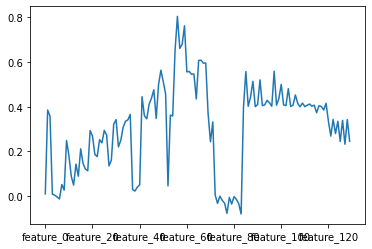

In [35]:
features.describe().loc["mean"].plot()

In [66]:
features = features.apply(lambda x: replace_with_mean(x))

<AxesSubplot:>

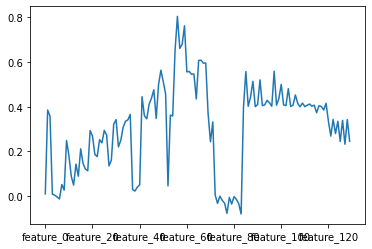

In [67]:
# Shouldnt change after replace
features.describe().loc["mean"].plot()

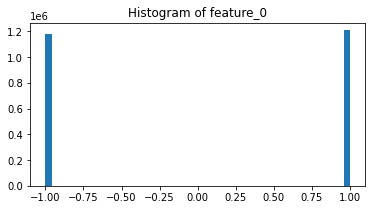

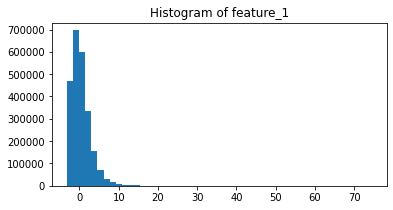

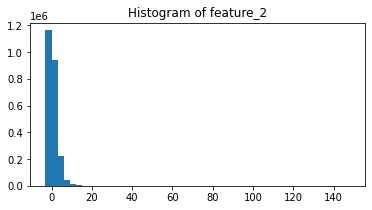

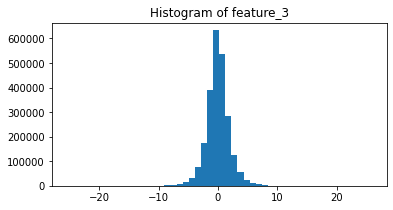

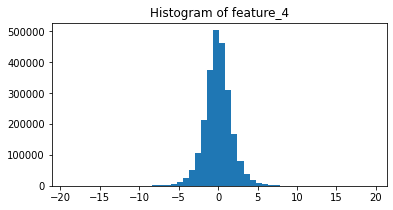

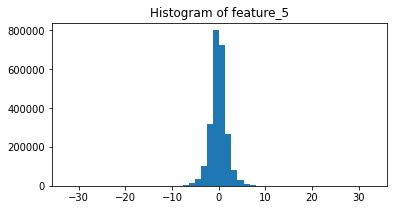

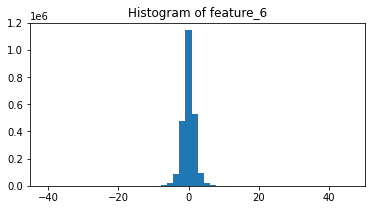

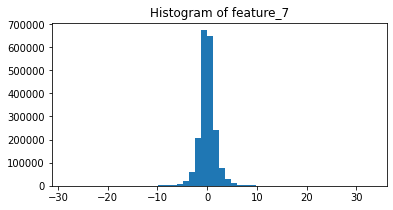

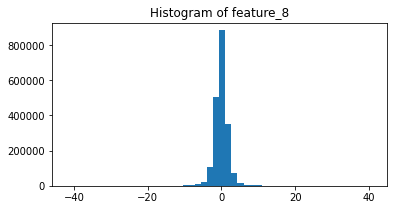

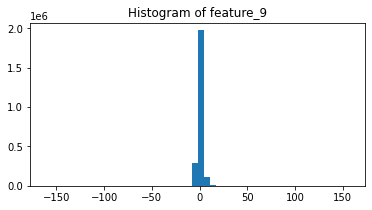

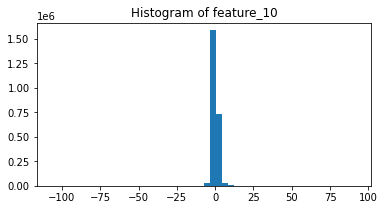

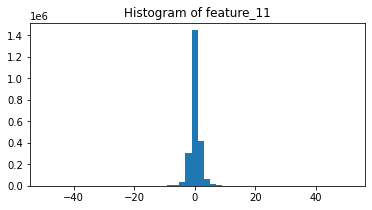

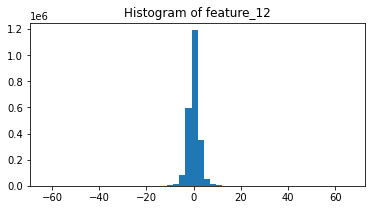

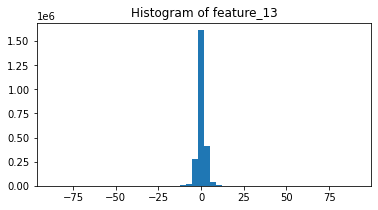

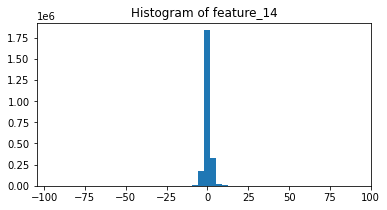

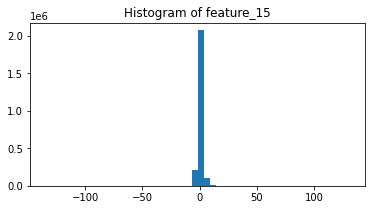

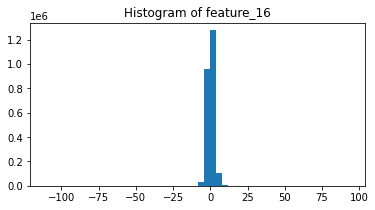

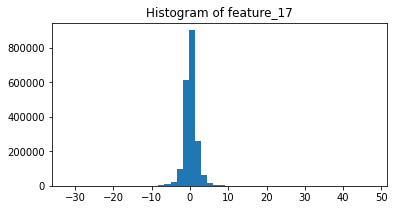

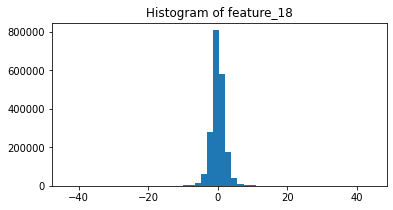

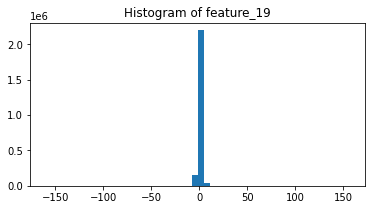

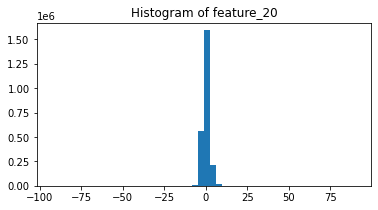

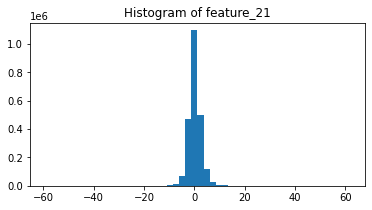

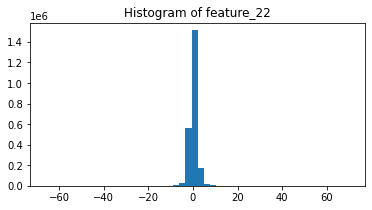

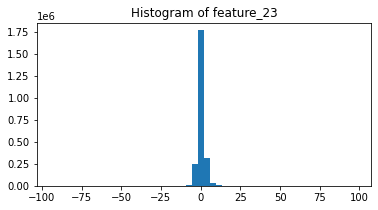

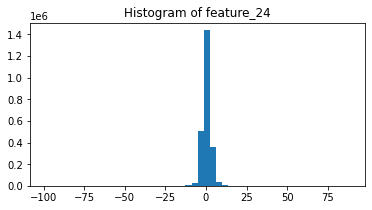

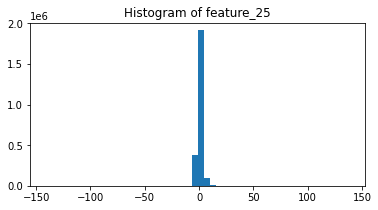

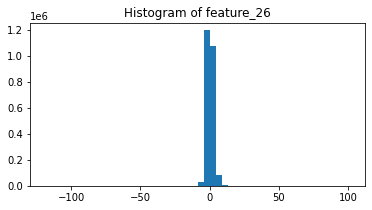

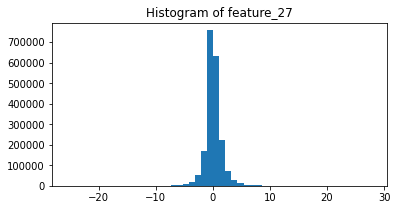

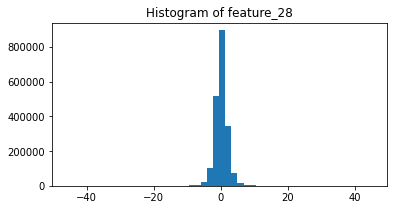

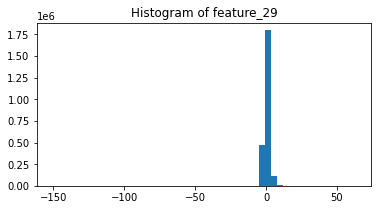

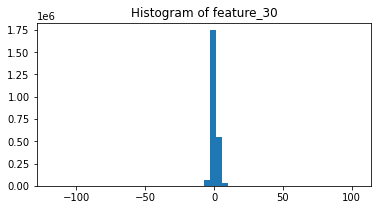

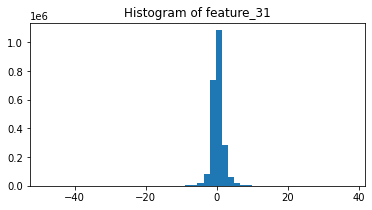

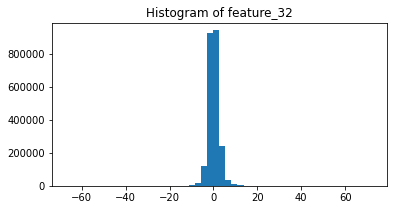

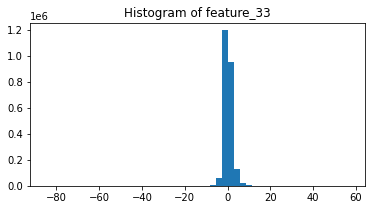

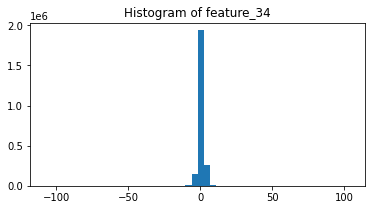

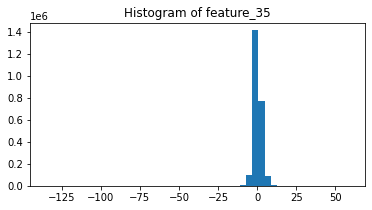

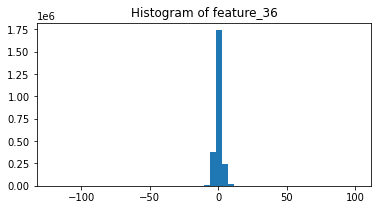

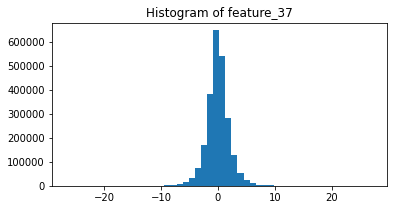

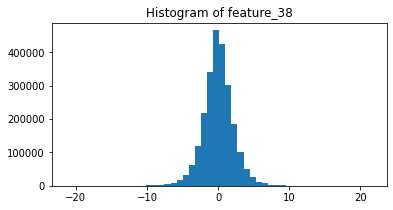

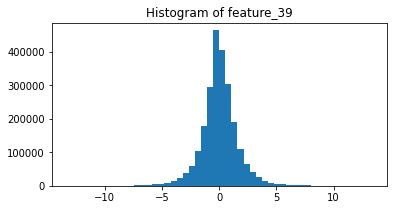

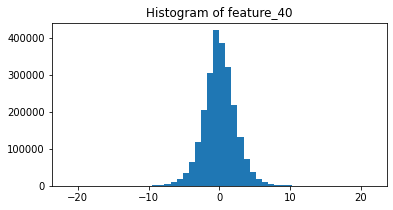

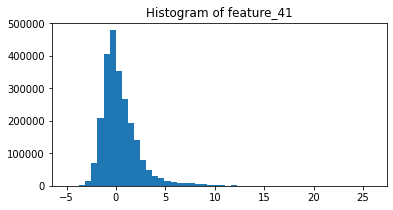

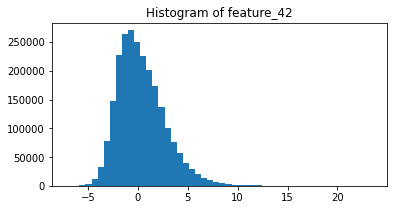

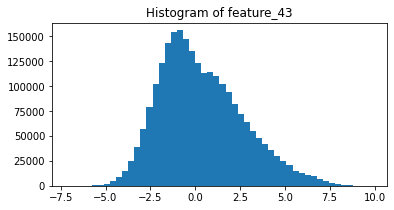

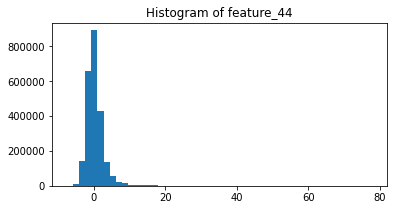

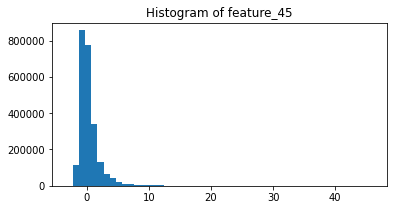

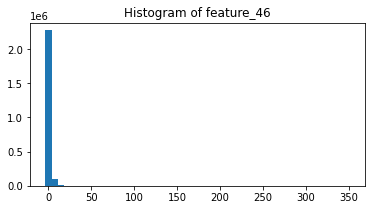

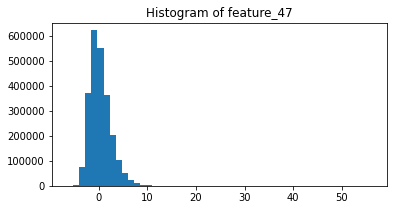

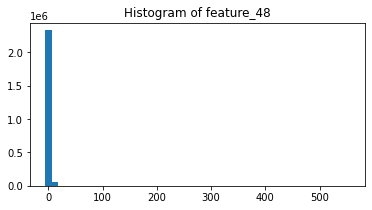

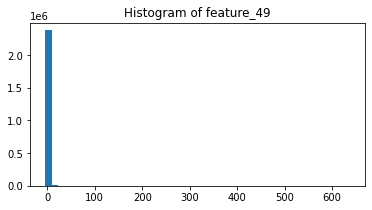

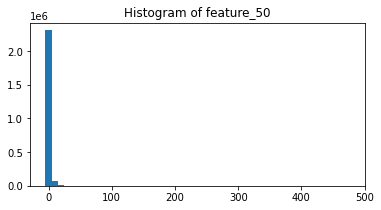

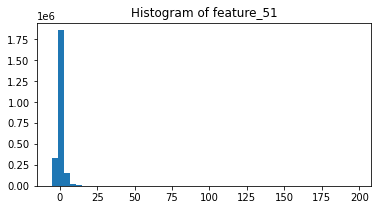

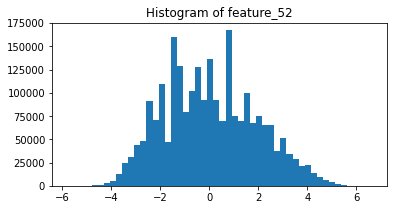

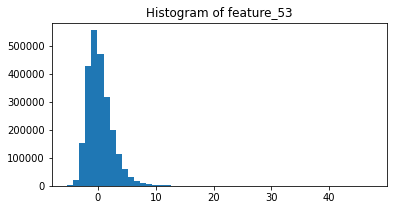

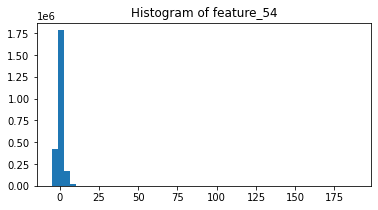

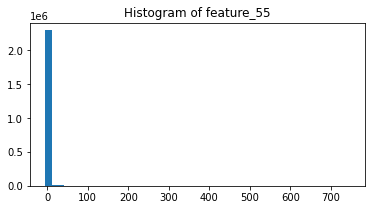

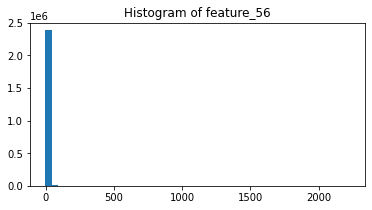

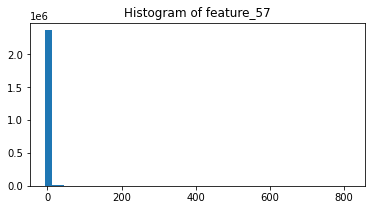

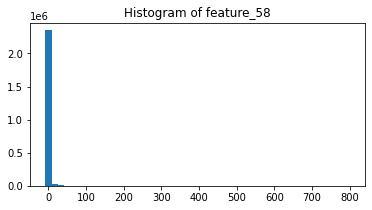

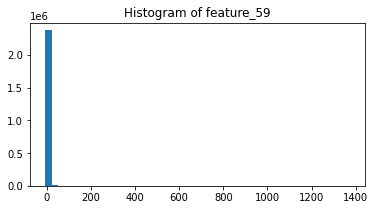

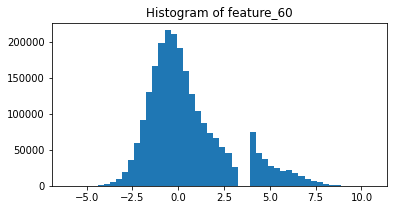

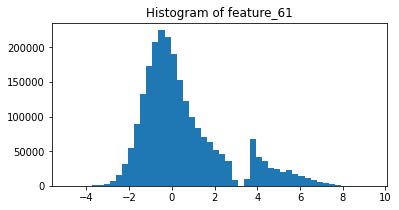

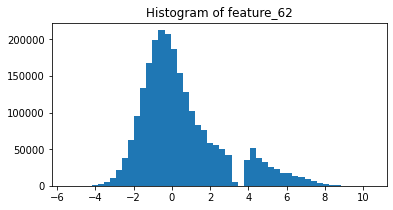

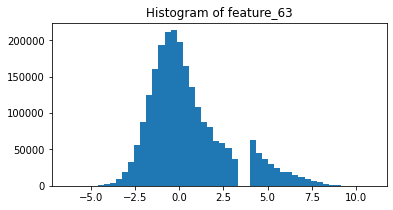

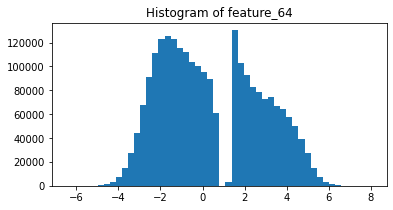

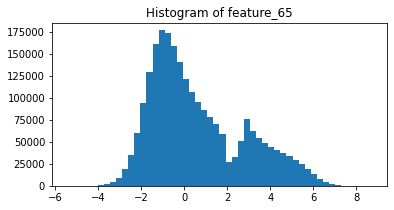

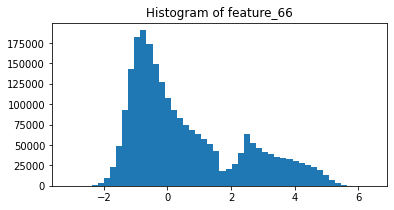

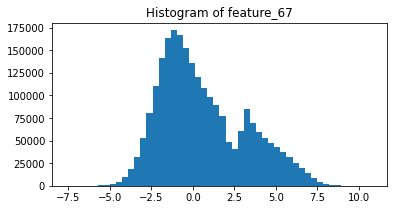

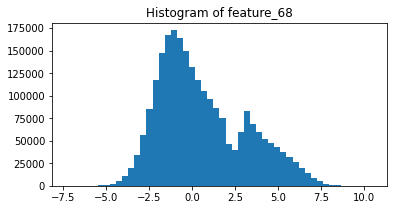

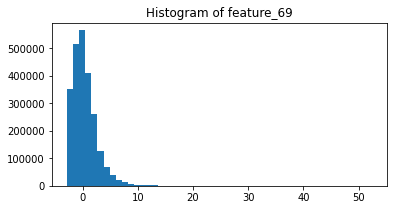

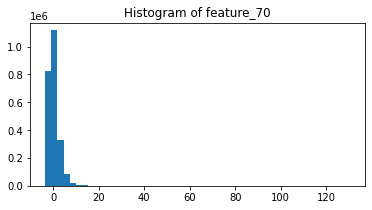

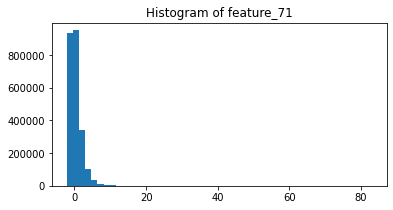

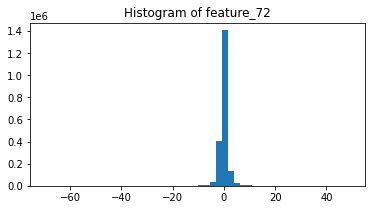

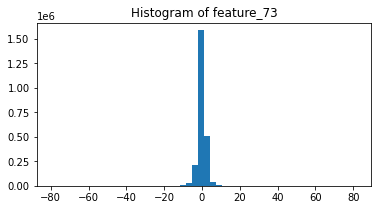

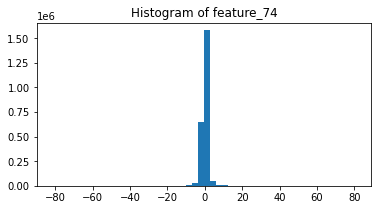

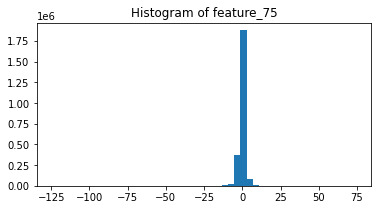

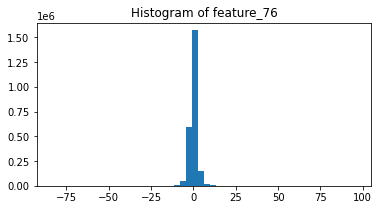

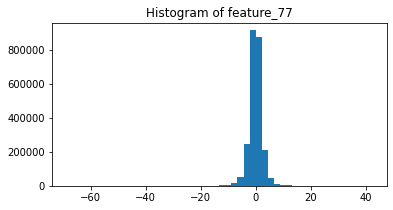

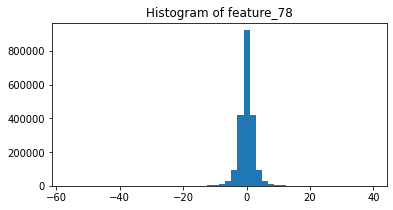

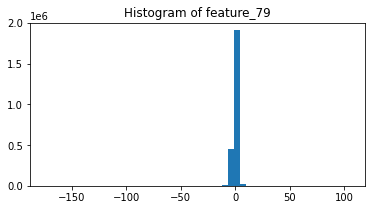

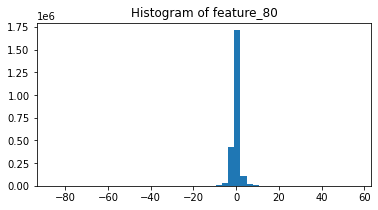

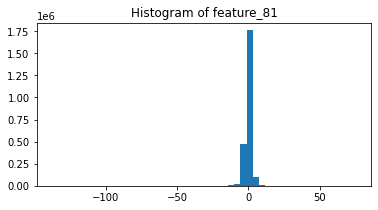

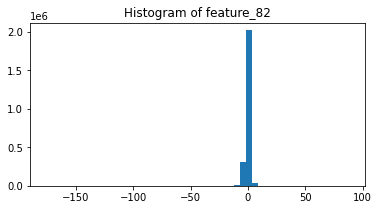

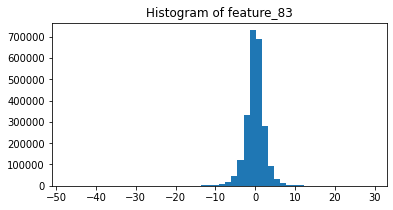

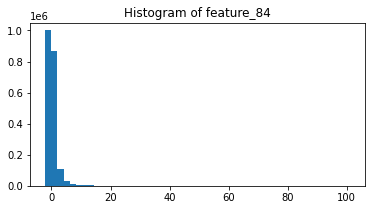

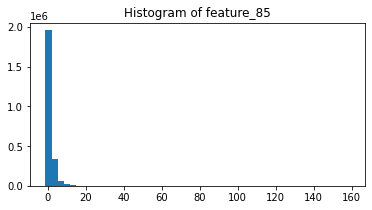

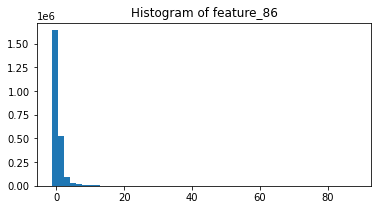

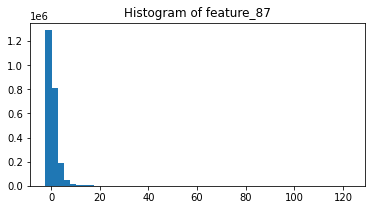

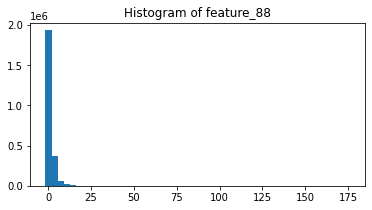

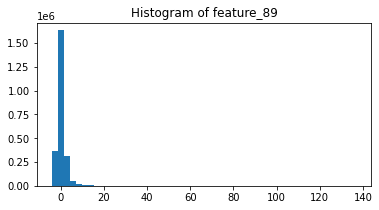

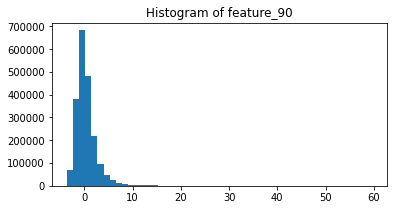

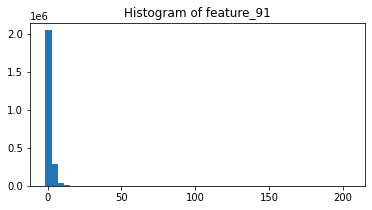

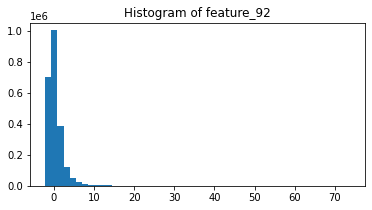

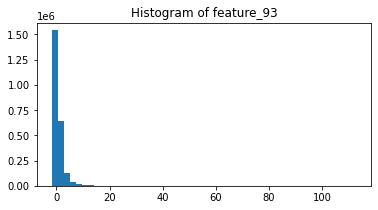

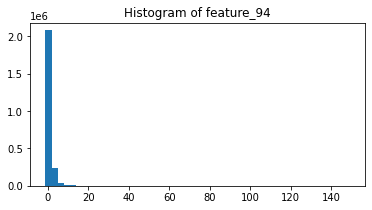

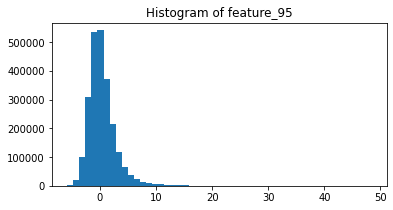

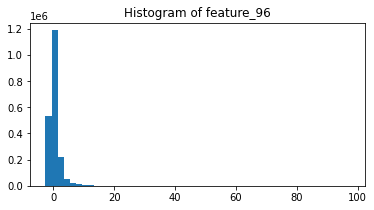

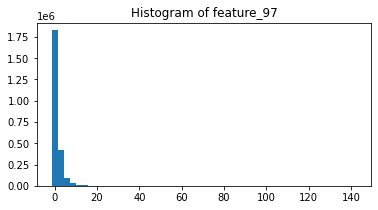

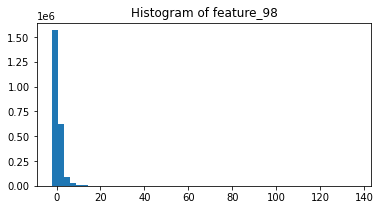

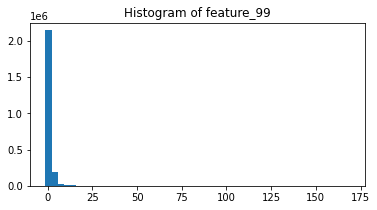

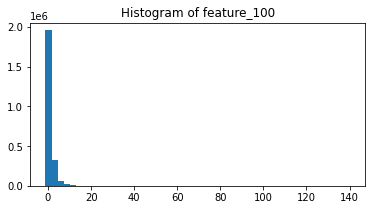

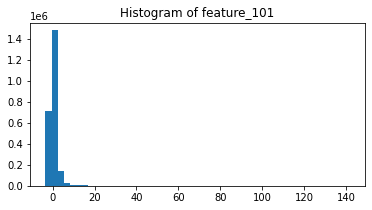

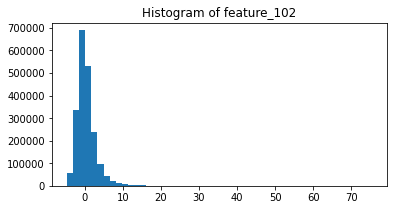

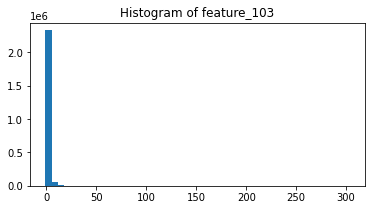

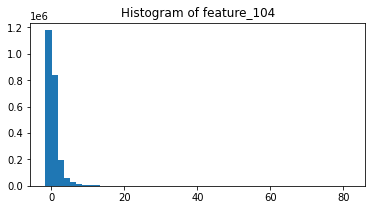

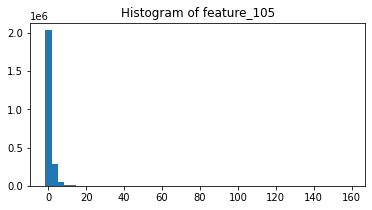

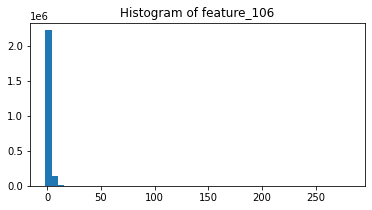

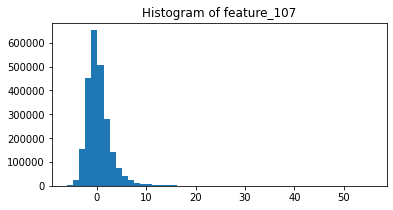

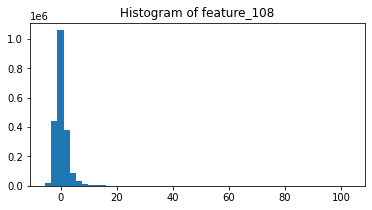

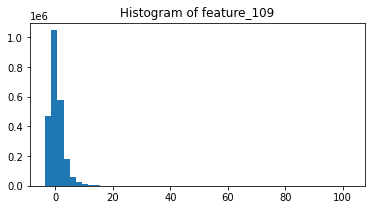

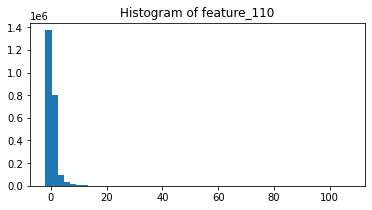

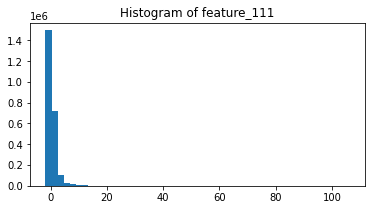

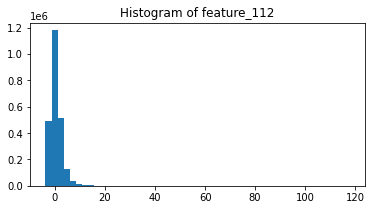

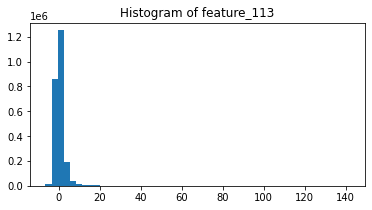

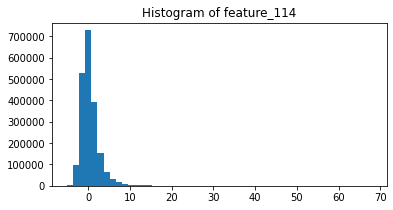

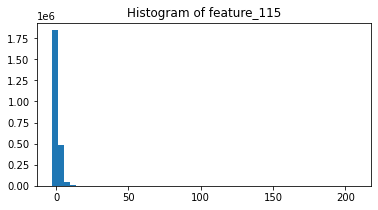

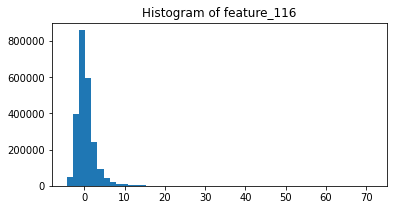

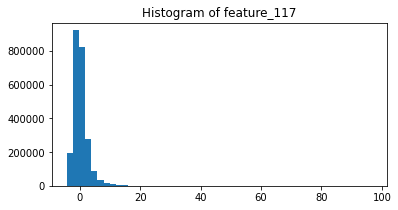

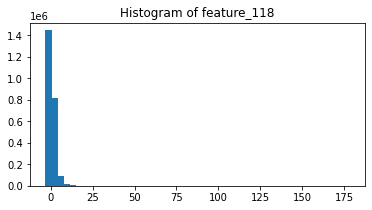

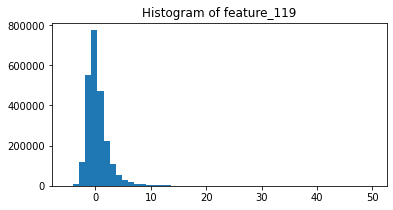

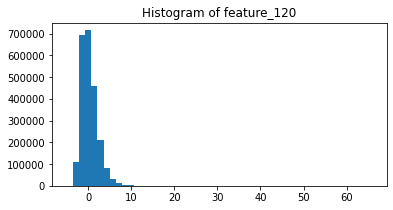

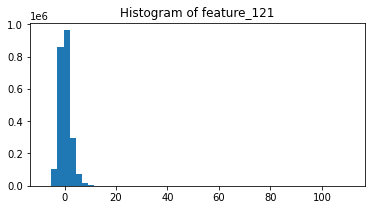

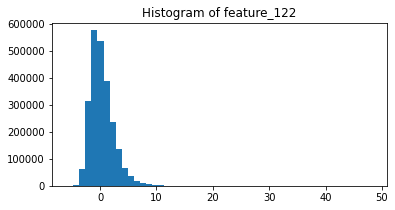

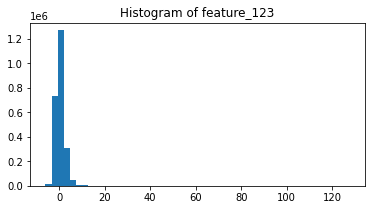

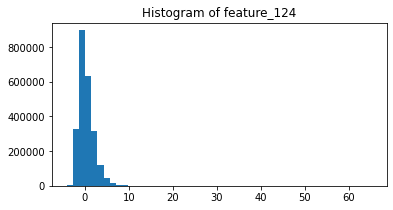

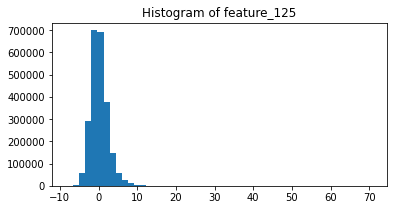

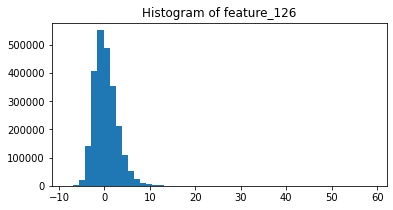

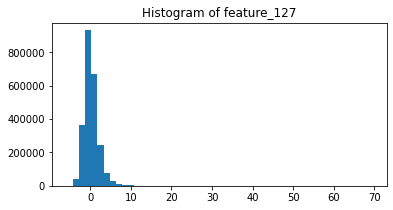

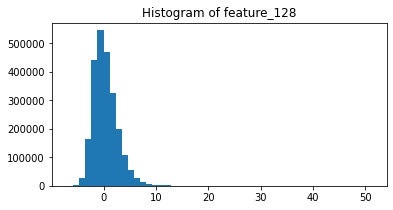

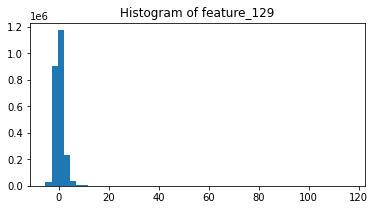

In [43]:
n_bins = 50 # can decrease to get a wider bin (or vice versa)

for column_name in feature_col:
    ax=plt.subplots(figsize=(6,3))
    # get data by column_name and display a histogram
    ax = plt.hist(train_data[column_name], bins=n_bins)
    title="Histogram of " + column_name
    plt.title(title, fontsize=12)
    plt.show()


In [68]:
train_data_np = features.to_numpy()

In [69]:
train_data_np.shape

(2390491, 130)

In [70]:
pca = PCA(n_components=130)
pca.fit(train_data_np)

PCA(n_components=130)

In [73]:
params = pca.get_params()

In [88]:
def get_min_num(pca,min_exp=0.80):
    """
    Returns number of principle components that are
    necessary to reach a given min explained variance 
    threshold
    """
    explained_var = pca.explained_variance_ratio_.cumsum()
    
    return np.where(explained_var >= min_exp)[0][0] - 1

In [86]:
pca.explained_variance_ratio_.cumsum() >= .90

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [99]:
min_idx = get_min_num(pca,min_exp=0.9)

In [96]:
v = pca.components_

In [91]:
import seaborn as sns

In [101]:
v[:min_idx].shape

(21, 130)

In [111]:
def display_component(v, features_list, min_idx, n_weights=10):
    
    # get the list of weights from a row in v, dataframe
    v_1 = v[min_idx,:]

    # match weights to features in counties_scaled dataframe, using list comporehension
    comps = pd.DataFrame(list(zip(v_1, features_list)), 
                         columns=['weights', 'features'])

    # we'll want to sort by the largest n_weights
    # weights can be neg/pos and we'll sort by magnitude
    comps['abs_weights']=comps['weights'].apply(lambda x: np.abs(x))
    sorted_weight_data = comps.sort_values('abs_weights', ascending=False).head(n_weights)

    # display using seaborn
    ax=plt.subplots(figsize=(10,6))
    ax=sns.barplot(data=sorted_weight_data, 
                   x="weights", 
                   y="features", 
                   palette="Blues_d")
    ax.set_title("PCA Component Makeup, Component #" + str(min_idx))
    plt.show()

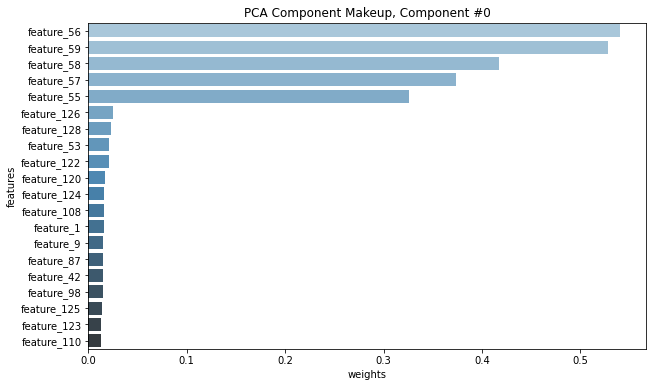

In [117]:
display_component(v,feature_col,0,n_weights=20)

In [127]:
# create dimensionality-reduced data
def create_transformed(pca, features, n_top_components):
    ''' Return a dataframe of data points with component features. 
        The dataframe should be indexed by State-County and contain component values.
        :param train_pca: A list of pca training data, returned by a PCA model.
        :param features: A dataframe of features.
        :param n_top_components: An integer, the number of top components to use.
        :return: A dataframe with n_top_component values as columns.        
     '''
    # create new dataframe to add data to
    transformed= pca.transform(features)

    # keep only the top n components    
    transformed = transformed[:,:n_top_components]
    
    return transformed



In [129]:
projected = create_transformed(pca,features.to_numpy(),n_top_components=10)

In [130]:
projected.shape

(2390491, 10)